In [77]:
import os
from os import path

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Flatten, Dropout
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = 'C:/Prabal/projects/fruit and vegitable detection/train'
valid_dir = 'C:/Prabal/projects/fruit and vegitable detection/validation'
test_dir = 'C:/Prabal/projects/fruit and vegitable detection/test'

In [3]:
print(len(train_dir))

54


In [4]:
totalFiles = 0

for root, dirs, files in os.walk(train_dir):
        for Files in files:
#             print(root)
            totalFiles += 1
        print("{} files in {}".format(len(files),root))
        
print('total files:', totalFiles)

0 files in C:/Prabal/projects/fruit and vegitable detection/train
68 files in C:/Prabal/projects/fruit and vegitable detection/train\apple
75 files in C:/Prabal/projects/fruit and vegitable detection/train\banana
88 files in C:/Prabal/projects/fruit and vegitable detection/train\beetroot
90 files in C:/Prabal/projects/fruit and vegitable detection/train\bell pepper
92 files in C:/Prabal/projects/fruit and vegitable detection/train\cabbage
89 files in C:/Prabal/projects/fruit and vegitable detection/train\capsicum
82 files in C:/Prabal/projects/fruit and vegitable detection/train\carrot
79 files in C:/Prabal/projects/fruit and vegitable detection/train\cauliflower
87 files in C:/Prabal/projects/fruit and vegitable detection/train\chilli pepper
87 files in C:/Prabal/projects/fruit and vegitable detection/train\corn
94 files in C:/Prabal/projects/fruit and vegitable detection/train\cucumber
84 files in C:/Prabal/projects/fruit and vegitable detection/train\eggplant
92 files in C:/Prabal/p

In [5]:
def get_file_name(path):
    return os.listdir(path)
name=get_file_name(train_dir)
print(name)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [7]:
def transform_dt(path):
    tf_ds=tf.keras.utils.image_dataset_from_directory(path,labels='inferred',label_mode='categorical',image_size=(128,128),batch_size=32,seed=42)
    print("data set from directory has been created")
    return tf_ds

In [8]:
train_ds=transform_dt(train_dir)
valid_ds=transform_dt(valid_dir)
test_ds=transform_dt(valid_dir)

Found 3115 files belonging to 36 classes.
data set from directory has been created
Found 351 files belonging to 36 classes.
data set from directory has been created
Found 351 files belonging to 36 classes.
data set from directory has been created


In [11]:
print(train_ds)

<BatchDataset shapes: ((None, 128, 128, 3), (None, 36)), types: (tf.float32, tf.float32)>


In [12]:
class_name=train_ds.class_names
print(class_name)
print(len(class_name))

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
36


In [13]:
train_ds.take(1)

<TakeDataset shapes: ((None, 128, 128, 3), (None, 36)), types: (tf.float32, tf.float32)>

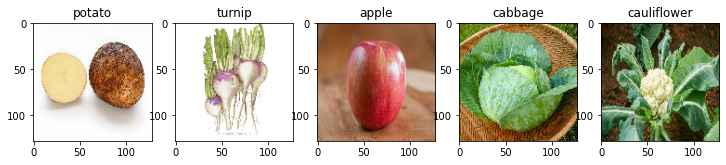

In [14]:
plt.figure(figsize=(25,20))
for image,label in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(1, 10, i+1)
        plt.imshow(image[i].numpy().astype('int'))
        plt.title(train_ds.class_names[tf.argmax(label[i])])

In [15]:
data_augmentation=keras.Sequential([layers.RandomFlip('horizontal_and_vertical'),layers.RandomRotation(0.2)])

rescaling=keras.Sequential([layers.Rescaling(1./255)])

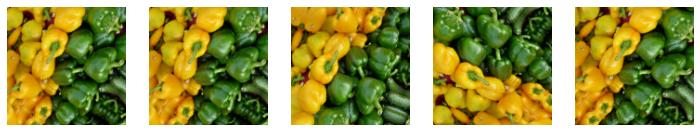

In [16]:
plt.figure(figsize=(25,20))
for image, label in train_ds.take(1):
    for i in range(5):
        augmentation=data_augmentation(image)
        ax=plt.subplot(1,10,i+1)
        plt.imshow(augmentation[0].numpy().astype('uint8'))
        plt.axis('off')

In [17]:
for image,label in train_ds:
    print(image.shape)
    print(label.shape)
    
    break

(32, 128, 128, 3)
(32, 36)


In [18]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [92]:
model=Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu"))
model.add(AveragePooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(AveragePooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(36))
model.add(Activation('softmax'))


In [111]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 128, 128, 16)      208       
                                                                 
 average_pooling2d_10 (Avera  (None, 64, 64, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 32)        2080      
                                                                 
 average_pooling2d_11 (Avera  (None, 32, 32, 32)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 64)        8256      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 16, 16, 64)     

In [95]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=15)

Epoch 1/15
98/98 [==============================] - 24s 233ms/step - loss: 13.0024 - accuracy: 0.0751 - val_loss: 2.6655 - val_accuracy: 0.3704
Epoch 2/15
98/98 [==============================] - 23s 236ms/step - loss: 2.5675 - accuracy: 0.3352 - val_loss: 1.5529 - val_accuracy: 0.6496
Epoch 3/15
98/98 [==============================] - 23s 238ms/step - loss: 1.7729 - accuracy: 0.5705 - val_loss: 1.7452 - val_accuracy: 0.6439
Epoch 4/15
98/98 [==============================] - 26s 269ms/step - loss: 1.2347 - accuracy: 0.7268 - val_loss: 0.7780 - val_accuracy: 0.8604
Epoch 5/15
98/98 [==============================] - 25s 258ms/step - loss: 0.9902 - accuracy: 0.7939 - val_loss: 0.7768 - val_accuracy: 0.8746
Epoch 6/15
98/98 [==============================] - 23s 236ms/step - loss: 0.6723 - accuracy: 0.8671 - val_loss: 0.8353 - val_accuracy: 0.8832
Epoch 7/15
98/98 [==============================] - 23s 232ms/step - loss: 0.7667 - accuracy: 0.8857 - val_loss: 1.1212 - val_accuracy: 0.868

In [96]:
arr=model.evaluate(train_ds, verbose=1)

98/98 [==============================] - 7s 74ms/step - loss: 0.0860 - accuracy: 0.9843


In [97]:
print("accuracy =", arr[1])

accuracy = 0.9842696785926819


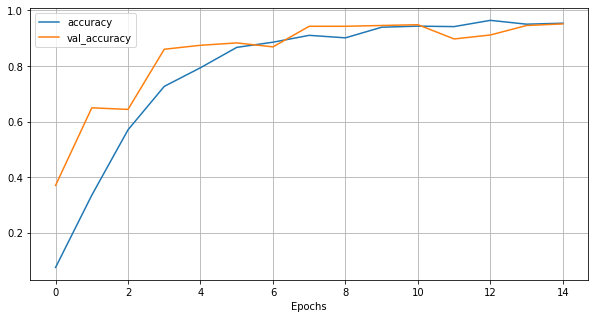

Text(0.5, 0, 'Epochs')

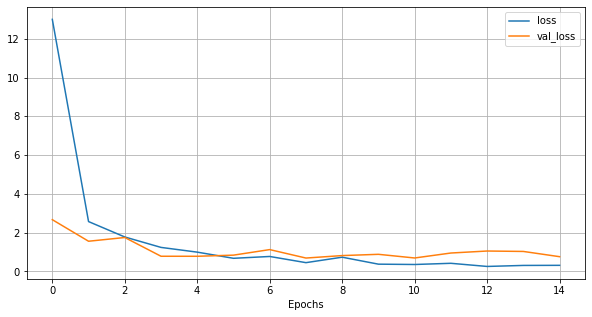

In [98]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.grid(True)
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.xlabel('Epochs')

In [99]:
prediction=model.predict(test_ds)
print(prediction)
print(len(prediction))

[[8.58147864e-09 9.99990702e-01 9.95153293e-10 ... 2.79668888e-09
  3.78798548e-09 8.76071926e-09]
 [2.31036957e-21 9.94063754e-38 2.95286382e-23 ... 1.06910716e-35
  6.71324069e-19 1.92287307e-23]
 [3.40778570e-08 1.32255352e-07 3.40372083e-07 ... 1.68845202e-06
  3.54311080e-04 8.28344309e-06]
 ...
 [1.24010940e-05 1.49808242e-04 2.49818891e-06 ... 9.41132676e-05
  2.10779081e-06 2.78409379e-06]
 [1.81444554e-14 1.93070999e-20 9.21739958e-21 ... 1.61101452e-22
  1.58371244e-12 1.58696778e-10]
 [3.85444385e-11 6.20650531e-27 2.37822029e-08 ... 1.59950271e-15
  2.64167638e-14 9.62745389e-07]]
351


In [100]:
print(prediction[0])

[8.5814786e-09 9.9999070e-01 9.9515329e-10 2.9005595e-11 4.2107604e-15
 5.3786986e-10 1.0318123e-08 1.5678482e-10 1.3563441e-07 1.2052574e-08
 1.5967285e-11 6.7318200e-11 1.2920108e-10 2.1804431e-07 8.8024837e-11
 1.0979635e-10 2.9259590e-07 2.8477220e-06 5.7361890e-13 2.2453210e-06
 1.6377912e-09 1.5078144e-09 9.7380928e-07 8.0676094e-10 3.0278681e-08
 9.1653032e-09 1.7457975e-07 7.9951910e-08 2.3324261e-11 2.2112949e-06
 1.7048387e-11 3.6013653e-08 1.9495456e-09 2.7966889e-09 3.7879855e-09
 8.7607193e-09]


In [101]:
print(max(prediction[0]))

0.9999907


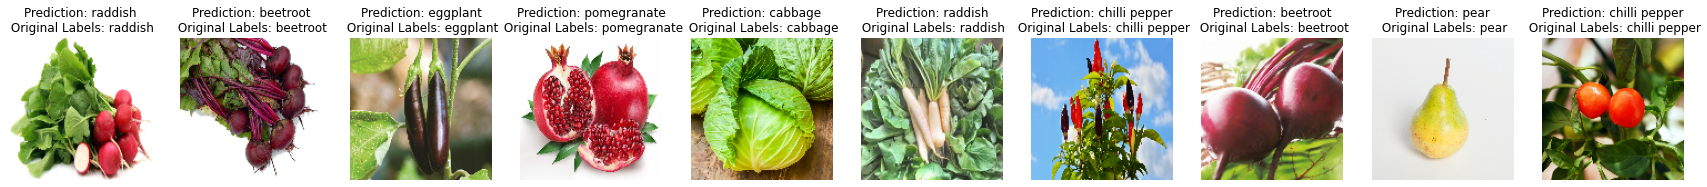

In [115]:
test_labels = test_ds.class_names

plt.figure(figsize=(30,25))

for image, label in train_ds.take(1):
    model_prediction = model.predict(image)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(image[i].numpy().astype('int'))
        plt.title(f"Prediction: {test_labels[tf.argmax(tf.round(model_prediction[i]))]}\n Original Labels: {test_labels[tf.argmax(label[i])]}")
        plt.grid(True)
        plt.axis('off')
        
    plt.show()